# RFM Model for Online Retail Sales Data

The idea of the RFM analysis of this dataset was brought about by the quest for perfection in data analysis with constant study and practice. This dataset was sourced from dataworld and is made up of few columns and 541909 row.

In [28]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')

In [29]:
#Importing dataset to dataframe
df=pd.read_csv(r'C:\Users\HP\OneDrive\Documents\Python Scripts\online_retail.csv')

In [3]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01T08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01T08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01T08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01T08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01T08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09T12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09T12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09T12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09T12:50:00,4.15,12680.0,France


# DATA CLEANING

The cleaning process requires finding null values and filling them with mean and mode,

Replacing some null values with N/A,

Drop some irrelevant columns,

Drop Duplicates

In [3]:
#Knowing and cleaning the data
df.shape

(541909, 8)

In [5]:
df.dtypes

invoiceno       object
stockcode       object
description     object
quantity         int64
invoicedate     object
unitprice      float64
customerid     float64
country         object
dtype: object

In [6]:
#Checking for missing values
df.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [30]:
#Replacing null values with NA
df['customerid'].replace(np.nan,"Unknown", inplace=True)
df['description'].replace(np.nan,"Unknown", inplace=True)

In [8]:
df.isnull().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

In [31]:
#dropping unneccesary column
df=df.drop(['stockcode',], axis=1)


In [10]:
df.duplicated().sum()

5338

In [32]:
df=df.drop_duplicates()

In [12]:
df

,invoiceno,description,quantity,invoicedate,unitprice,customerid,country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01T08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01T08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01T08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01T08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01T08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09T12:50:00,0.85,12680.0,France
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09T12:50:00,2.10,12680.0,France
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09T12:50:00,4.15,12680.0,France
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09T12:50:00,4.15,12680.0,France


In [13]:
df.describe()

,quantity,unitprice
count,536571.000000,536571.000000
mean,9.620690,4.633062
std,219.144419,97.239453
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


# Data Modification

Modification of data by creating new column Total price

In [33]:
#Creating a new column Total(unit price * quantity)
df['Total']=df['quantity']*df['unitprice']
df

,invoiceno,description,quantity,invoicedate,unitprice,customerid,country,Total
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01T08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01T08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01T08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01T08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01T08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09T12:50:00,0.85,12680.0,France,10.20
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09T12:50:00,2.10,12680.0,France,12.60
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09T12:50:00,4.15,12680.0,France,16.60
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09T12:50:00,4.15,12680.0,France,16.60


In [23]:
df.dtypes

invoiceno              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid             object
country                object
Total                 float64
dtype: object

# Grouping custumer id

Creating a snapshot of the date, using our df_data

Grouping customerID after creating the snapshot date

Renaming our features — columns (nvoiceDate, InvoiceNo,TotalSum) with Recency, Frequency and Monetary respectively


In [34]:
df['invoicedate'].max()

'2011-12-09T12:50:00'

In [39]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

In [38]:
from datetime import datetime
now = pd.to_datetime('2011-12-10')

In [41]:
#Grouping customerid
df = df.groupby(['customerid']).agg({
    'invoicedate': lambda x: (now - x.max()).days,
    'invoiceno': 'count',
    'Total': 'sum'
}).reset_index()

In [42]:
df

,customerid,invoicedate,invoiceno,Total
0,12346.0,325,2,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4368,18281.0,180,7,80.82
4369,18282.0,7,13,176.60
4370,18283.0,3,721,2045.53
4371,18287.0,42,70,1837.28


In [43]:
# Renaming the columns 
df.rename(columns={'invoicedate': 'Recency',
                         'invoiceno': 'Frequency',
                         'Total': 'MonetaryValue'}, inplace=True)

In [35]:
df

,customerid,Recency,Frequency,MonetaryValue
0,12346.0,325,2,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4368,18281.0,180,7,80.82
4369,18282.0,7,13,176.60
4370,18283.0,3,721,2045.53
4371,18287.0,42,70,1837.28


# Distribution

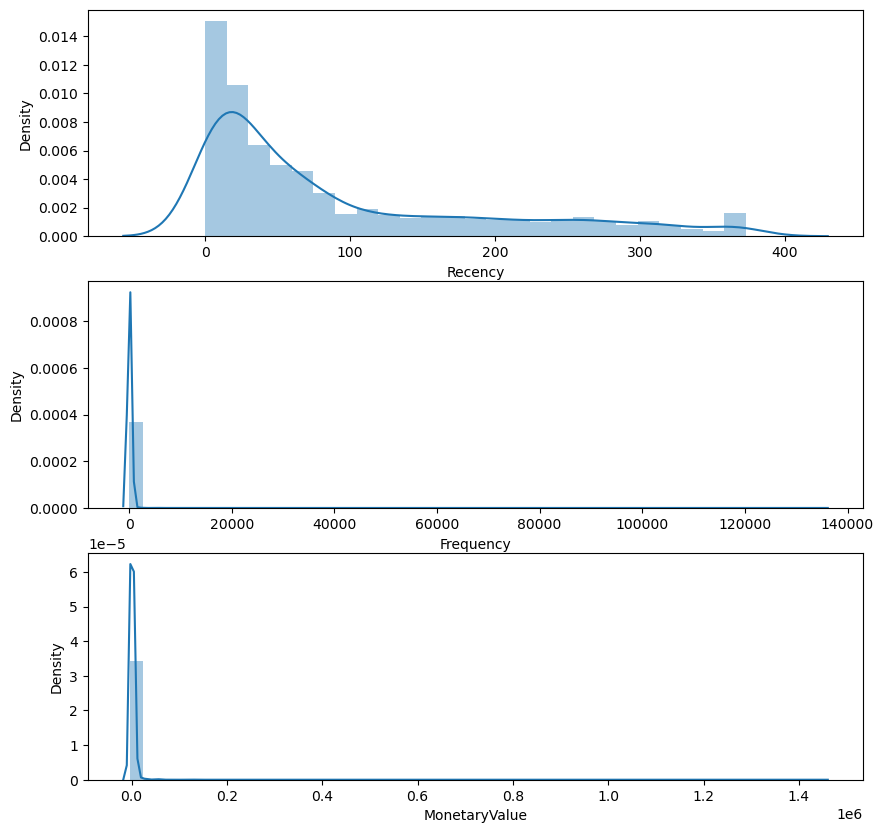

In [44]:
# Plotting RFM distributions
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1); sns.distplot(df['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df['MonetaryValue'])
plt.show()

# Building the RFM Groups

Calculating the R,F and M groups

Creating labels for Recency, Frequency and Monetary Value,

Assigning labels created to 4 equal percentile groups,

Then create new columns R, F and M.

In [52]:
#Calculating R and F groups
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(df['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(df['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
df = df.assign(R = r_groups.values, F = f_groups.values)
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(df['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
df = df.assign(M = m_groups.values)
df.head()

,customerid,Recency,Frequency,MonetaryValue,R,F,M
0,12346.0,325,2,0.00,1,1,1
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


# Building the RFM Model

In [54]:
# Concating the RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
df['df_Concat'] = df.apply(join_rfm, axis=1)
df = df
df.head()

,customerid,Recency,Frequency,MonetaryValue,R,F,M,df_Concat
0,12346.0,325,2,0.00,1,1,1,111
1,12347.0,2,182,4310.00,4,4,4,444
2,12348.0,75,31,1797.24,2,2,4,224
3,12349.0,18,73,1757.55,3,3,4,334
4,12350.0,310,17,334.40,1,1,2,112


In [63]:
#Now let's count the number of unique segments
#Then Calculate the RFM score with the python scripts below.
# Count num of unique segments
df_rfm_count_unique = df.groupby('df_Concat')['df_Concat'].nunique()
print(df_rfm_count_unique.sum())
# Calculate RFM_Score
df['RFM_Score'] = df[['R','F','M']].sum(axis=1)
print(df['RFM_Score'].head())

62
0     3
1    12
2     8
3    10
4     4
Name: RFM_Score, dtype: int64


Creating a conditional Statement using the python scripts below to segment Customers (by customerID column) as either

Can’t Lose Them, or Champions, or Loyal/Committed, or Potential, or Promising, or Requires attention or Demands Activation:


In [68]:
#Then we create a conditional Statement using the python scripts below to
#segment Customers (by customerID column) as either Can’t Lose Them, or Champions, 
#or Loyal/Committed, or Potential, or Promising, or Requires attention or Demands Activation:
# Define FMCG_rfm_level function
def df_rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal/Commited'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Requires Attention'
    else:
        return 'Demands Activation'
# Create a new variable RFM_Level
df['RFM_Level'] = df.apply(df_rfm_level, axis=1)
# Printing the header with top 15 rows 
df.head(15)

,customerid,Recency,Frequency,MonetaryValue,R,F,M,df_Concat,RFM_Score,RFM_Level
0,12346.0,325,2,0.00,1,1,1,111,3,Demands Activation
1,12347.0,2,182,4310.00,4,4,4,444,12,Can't Loose Them
2,12348.0,75,31,1797.24,2,2,4,224,8,Champions
3,12349.0,18,73,1757.55,3,3,4,334,10,Can't Loose Them
4,12350.0,310,17,334.40,1,1,2,112,4,Requires Attention
5,12352.0,36,95,1545.41,3,3,3,333,9,Can't Loose Them
6,12353.0,204,4,89.00,1,1,1,111,3,Demands Activation
7,12354.0,232,58,1079.40,1,3,3,133,7,Loyal/Commited
8,12355.0,214,13,459.40,1,1,2,112,4,Requires Attention
9,12356.0,22,59,2811.43,3,3,4,334,10,Can't Loose Them


Calculating the average values for each RFM_Level, and return a size of each segment

In [69]:
# Calculate average values for each RFM_Level, and return a size of each segment 
df_rfm_level_agg = df.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(df_rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      24.9     271.2        4955.3  1699
Champions             62.3      56.1         965.6   469
Demands Activation   264.6       7.9         109.3   392
Loyal/Commited        79.3      39.1         724.9   438
Potential             94.3      28.2         490.2   468
Promising            151.2      20.8         339.8   518
Requires Attention   175.0      13.8         226.5   389


# The Data Visualization of Customers Segmented Using the RFM Model

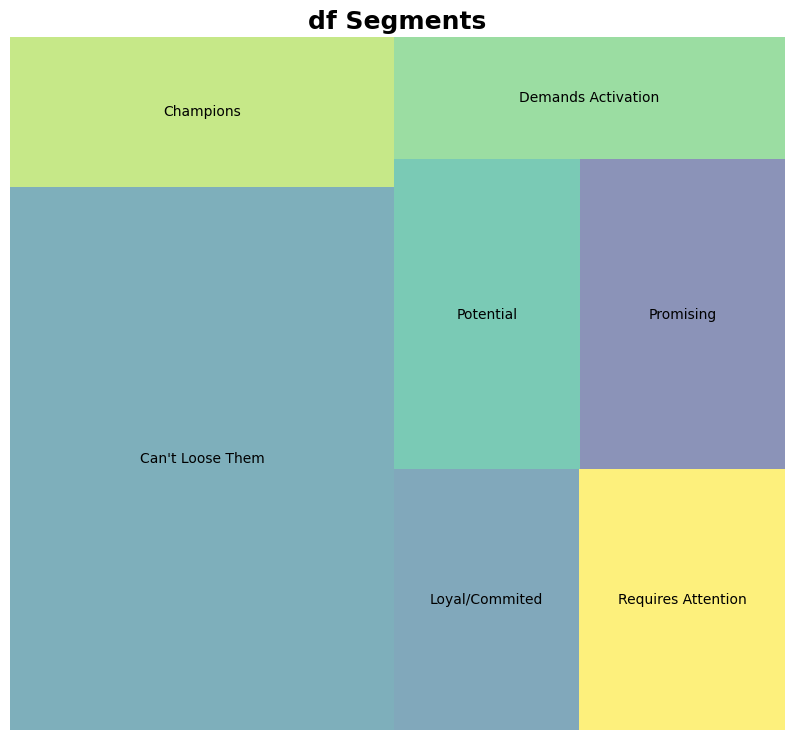

In [76]:
df_rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 9)
squarify.plot(sizes=df_rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal/Commited',
                     'Requires Attention',
                     'Potential', 
                     'Promising', 
                     'Demands Activation'], alpha=.6 )
plt.title("Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# RECOMMENDATIONS


Champions: These are our best customers who have made recent, frequent, and high-value purchases comprising of 10%. Retain them by offering exclusive deals, loyalty programs, and personalized experiences.

Can’t Lose Them: While not as high value as Champions, this segment is still valuable due to its frequency comprising of 40%. We will Focus on maintaining their loyalty through targeted promotions and engagement strategies.

Demands Activation : This segment represents customers who may have made high-value purchases in the past but are not active recently, comprising of 8%. Re-engage them with special offers, promotions, or personalized communication to activate their interest.

Potential: These customers have the potential to become more valuable with increased frequency and spending, comprising of 11%. Implement strategies to encourage repeat business and upsell higher-margin products.

Promising : This segment shows promise with both high frequency and high monetary values, comprising of 11%. Continue to nurture this group with exclusive offers and personalized experiences.

Loyal : These customers may not be as recent or frequent as Champions, but they demonstrate loyalty, comprising of 10%. Offer them rewards, discounts, or loyalty programs to strengthen their loyalty further.

Require Attention (10%): This group needs attention due to low recency, frequency, and monetary values, comprising of 10%. Implement targeted marketing campaigns to re-engage and encourage more frequent and higher-value purchases.